# Exploring & Visualizing Distribuions: Class Sizes @ Whitman

This notebook uses a dataset of historic class sizes at Whitman College for a subset of majors/departments to explore and visualize distributions.

_October 10, 2023
CS / Math 215_

## Part 1: Exploring the data

In [1]:
# import the packages we've been using all semester long
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# First, import the data file as a data frame
df_courses = pd.read_excel("whitman-course-sizes-2000-2023.xlsx")

### Your task:

Examine the dataset. Ask yourself: What does each row represent? Then, figure out: 

In [8]:
df_courses.head()

,Term,Name,Short Title,Subject,Min Cred,Max Cred,Capacity,Active Students Count,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,2002SP,ARTS-115-A,Beginning Drawing,ARTS,3.0,NaN,15.0,13,NaN,19:00-21:00,NaN,19:00-21:00,NaN,NaN,NaN
1,2002SP,ARTS-115-B,Beginning Drawing,ARTS,3.0,NaN,15.0,16,NaN,13:00-15:00,NaN,13:00-15:00,NaN,NaN,NaN
2,2002SP,ARTS-115-C,Beginning Drawing,ARTS,3.0,NaN,15.0,13,NaN,NaN,19:00-21:00,NaN,19:00-21:00,NaN,NaN
3,2002SP,ARTS-123-A,Beginning Photography,ARTS,3.0,NaN,9.0,12,NaN,08:00-10:00,NaN,08:00-10:00,NaN,NaN,NaN
4,2002SP,ARTS-127-A,Intro to Studio and Design,ARTS,3.0,NaN,15.0,15,NaN,10:00-12:00,NaN,10:00-12:00,NaN,NaN,NaN


In [4]:
# How many different majors are there in this data set and which are they?

df_courses["Subject"].nunique()

10

In [5]:
df_courses["Subject"].unique()

array(['ARTS', 'ASTR', 'BIOL', 'ECON', 'ENGL', 'JPNS', 'MATH', 'PHIL',
       'PSYC', 'CS'], dtype=object)

In [6]:
# What time period does this data frame cover?

df_courses["Term"].unique()

array(['2002SP', '2002FA', '2003SP', '2003FA', '2004SP', '2004FA',
       '2005SP', '2005FA', '2006SP', '2006FA', '2007SP', '2007FA',
       '2008SP', '2008FA', '2009SP', '2009FA', '2010SP', '2010FA',
       '2011SP', '2011SU', '2011FA', '2012SP', '2012FA', '2013SP',
       '2013FA', '2014SP', '2014FA', '2015SP', '2015FA', '2016SP',
       '2016FA', '2017SP', '2017SU', '2017FA', '2018SP', '2018FA',
       '2019SP', '2019SU', '2019FA', '2020SP', '2020FA', '2021SP',
       '2021FA', '2022SP', '2022FA', '2023SP', '2023FA'], dtype=object)

In [9]:
# How many *unique* course names are there in this dataset, based on the "Short Title"?

df_courses["Short Title"].nunique()

1260

In [10]:
# How many courses offerings (i.e. instances when a course was taught) are there for each major?

df_courses["Subject"].value_counts()

BIOL    2479
ARTS    1406
ENGL    1173
MATH    1055
PSYC     996
ECON     792
PHIL     731
ASTR     474
JPNS     279
CS       210
Name: Subject, dtype: int64

Ok, now that we have that down, let's answer some more complex questions:

In [11]:
# Last semester (Spring 2023), how many courses were there taught in each Subject/Major?

# Make a new dataframe for Spring 2023
df_SP2023 = df_courses[df_courses["Term"] == "2023SP"]

In [14]:
df_SP2023.groupby("Subject")["Short Title"].count()

Subject
ARTS    21
ASTR    10
BIOL    42
CS      16
ECON    17
ENGL    21
JPNS     7
MATH    25
PHIL    18
PSYC    23
Name: Short Title, dtype: int64

In [16]:
# Last semester (Spring 2023), what was the largest course?

df_SP2023[df_SP2023["Active Students Count"] == df_SP2023["Active Students Count"].max()]

,Term,Name,Short Title,Subject,Min Cred,Max Cred,Capacity,Active Students Count,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
9360,2023SP,PSYC-210-A,Psychological Statistics,PSYC,3.0,NaN,40.0,38,NaN,NaN,10:00-11:20,NaN,10:00-11:20,NaN,NaN


In [17]:
# Last semester (Spring 2023), which of the  majors in this dataset had the 
# highest and the lowest average class size?

df_SP2023.groupby("Subject")["Active Students Count"].mean().sort_values(ascending=False)

Subject
PSYC    18.913043
CS      17.312500
ECON    16.176471
ASTR    13.500000
BIOL    13.500000
ENGL    11.904762
MATH    11.640000
PHIL     9.000000
ARTS     8.238095
JPNS     5.000000
Name: Active Students Count, dtype: float64

In [18]:
# Last semester (Spring 2023), pick a Subject/Major and determine 
# the percent of classes with fewer than 20 students

df_SP2023_CS = df_SP2023[df_SP2023["Subject"] == "CS"]

In [20]:
len(df_SP2023_CS[df_SP2023_CS["Active Students Count"] < 20]) / len(df_SP2023_CS)

0.375

### CHALLENGE
Write a function that takes in two inputs -- a list of courses by course "Name" (i.e. ["CS-270-A", "CS-310-A", "ECON-107-A"] and a dataframe of course. It then returns the **mean experienced class size** for a student in those classes.


In [22]:
# YOUR CODE HERE
def mean_exp_class_size(course_list, dataframe):
    
    # Select courses that are in the list of course names
    # Some options:
        # Loop through your list, and select each course from the dataframe
        # Use a single Boolean statement using "in"
        
    # Average the "Active Students Count" values for those courses
    
    # Return the mean

In [ ]:
# Sample test case
#course_list = ["CS-270-B", "CS-310-A", "ECON-107-A"]
#mean_exp_class_size(course_list, df_SP2023)

## Part 2: Visualizing the data

Now, this is fun... but we can also use _visualizations_ to explore the data.

First, let's consider the *distributions* of the course sizes.

How might we use visualizations to examine each Subject/Major?

We could start by making a [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) for each one...

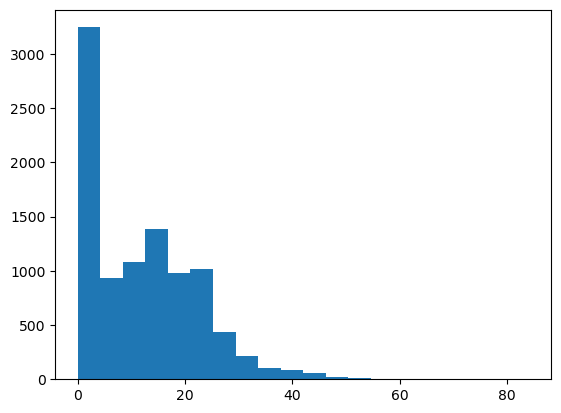

In [22]:
# Make a histogram of the course sizes (for all subjects, all years together)
# What do you notice?

# YOUR CODE HERE
plt.hist(df_courses["Active Students Count"], bins=20)
plt.show()

In [24]:
# Drop any course that only has 0 or 1 students in it
# You can either make a new data frame or modify the existing one

df_courses[df_courses["Active Students Count"] == 1]


,Term,Name,Short Title,Subject,Min Cred,Max Cred,Capacity,Active Students Count,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
12,2002SP,ARTS-240-A,Intermediate Book Arts,ARTS,3.0,NaN,5.0,1,NaN,NaN,10:00-12:00,NaN,10:00-12:00,NaN,NaN
16,2002SP,ARTS-302-A,Special Projects,ARTS,2.0,3.0,5.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,2002SP,ARTS-302-D,Special Projects,ARTS,2.0,3.0,5.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,2002SP,ARTS-323-A,Advanced Photography,ARTS,3.0,NaN,2.0,1,NaN,08:00-10:00,NaN,08:00-10:00,NaN,NaN,NaN
24,2002SP,ARTS-340-A,Advanced Book Arts,ARTS,3.0,NaN,2.0,1,NaN,NaN,10:00-12:00,NaN,10:00-12:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,2023FA,MATH-281-A,Is-Data Science Practicum,MATH,1.0,3.0,10.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9539,2023FA,MATH-320-A,Theory of Computation,MATH,3.0,NaN,20.0,1,NaN,NaN,13:00-14:20,NaN,13:00-14:20,NaN,NaN
9565,2023FA,PHIL-483-G,Is: Phenomenology & Embodiment,PHIL,3.0,NaN,5.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9566,2023FA,PHIL-488-A,Tutorial in Symbolic Logic,PHIL,4.0,NaN,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df_courses_filtered = df_courses[df_courses["Active Students Count"]> 1]

(array([1959., 1308., 1921., 1116.,  779.,  244.,  157.,   50.,   43.,
          12.,    8.,    0.,    0.,    0.,    2.]),
 array([ 2.        ,  7.46666667, 12.93333333, 18.4       , 23.86666667,
        29.33333333, 34.8       , 40.26666667, 45.73333333, 51.2       ,
        56.66666667, 62.13333333, 67.6       , 73.06666667, 78.53333333,
        84.        ]),
 <BarContainer object of 15 artists>)

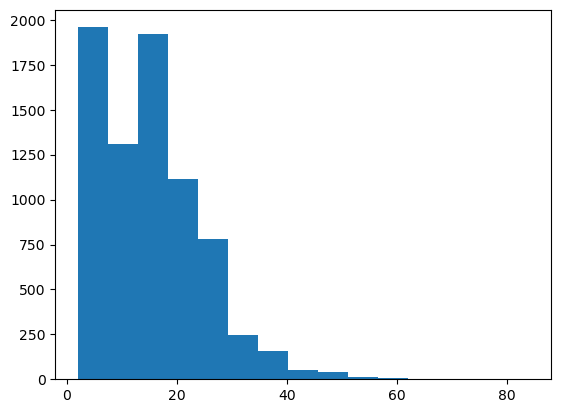

In [28]:
# Now redraw the histogram -- how is it different?

plt.hist(df_courses_filtered["Active Students Count"], bins =15)

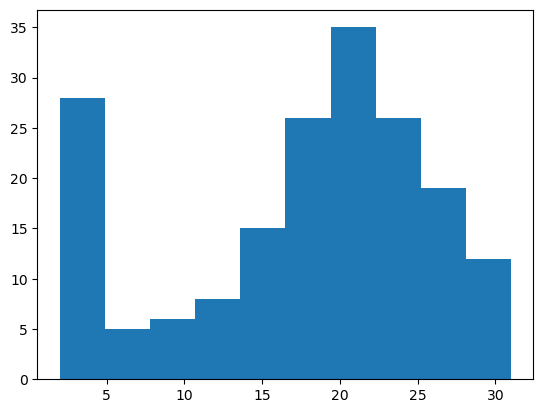

In [29]:
# Pick any Subject/Major you like
# Make a histogram of the class sizes for that Major

plt.hist(df_courses_filtered[df_courses_filtered["Subject"] == "CS"]["Active Students Count"])
plt.show()

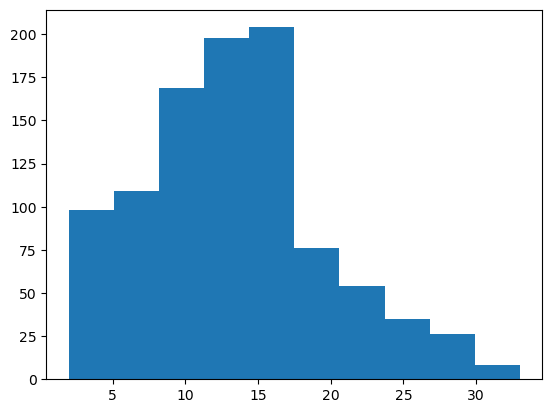

In [30]:
plt.hist(df_courses_filtered[df_courses_filtered["Subject"] == "ENGL"]["Active Students Count"])
plt.show()

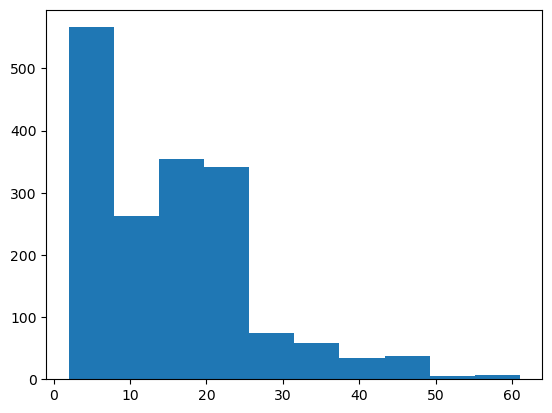

In [31]:
plt.hist(df_courses_filtered[df_courses_filtered["Subject"] == "BIOL"]["Active Students Count"])
plt.show()

Or, we could put multiple majors on one histogram.

Let's try that out...

Other things to try:
* How is it different if we use `density=True` or `density=False`?
* Can you add a legend?

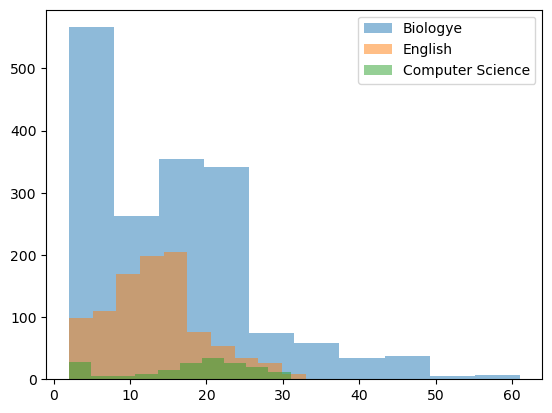

In [34]:
# Pick three Majors and plot histograms of their course sizes on the same plot...

plt.hist(df_courses_filtered[df_courses_filtered["Subject"]=="BIOL"]["Active Students Count"], density=False, alpha=0.5, label='Biologye')
plt.hist(df_courses_filtered[df_courses_filtered["Subject"]=="ENGL"]["Active Students Count"], density=False, alpha=0.5, label="English")
plt.hist(df_courses_filtered[df_courses_filtered["Subject"]=="CS"]["Active Students Count"], density=False, alpha=0.5, label="Computer Science")

plt.legend()

plt.show()

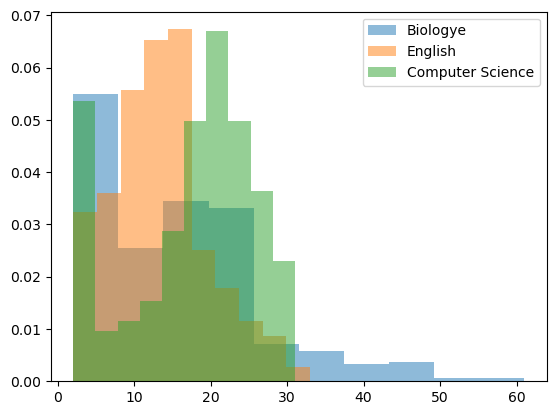

In [35]:
# Pick three Majors and plot histograms of their course sizes on the same plot...

plt.hist(df_courses_filtered[df_courses_filtered["Subject"]=="BIOL"]["Active Students Count"], density=True, alpha=0.5, label='Biologye')
plt.hist(df_courses_filtered[df_courses_filtered["Subject"]=="ENGL"]["Active Students Count"], density=True, alpha=0.5, label="English")
plt.hist(df_courses_filtered[df_courses_filtered["Subject"]=="CS"]["Active Students Count"], density=True, alpha=0.5, label="Computer Science")

plt.legend()

plt.show()

## Part 3: Introducing Seaborn

Ok, we are getting closer... But is there a better way? Let's try some of the plots we can make with Seaborn.

__What is Seaborn?__

Seaborn is a visualization package that runs on top of Matplotlib. It is specially designed for statistical analysis and for exploring distributions in data. You can find out more at: https://seaborn.pydata.org/. A great place to start is the [Seaborn Tutorial](https://seaborn.pydata.org/tutorial/introduction.html).

__Installation__

Depending on your Anaconda installation, you may need to install the package. 

First, try running the import code block below. If it works, great! 

If it doesn't work, open up a terminal and run this to install:

    conda install seaborn



In [36]:
# import Seaborn
import seaborn as sns

The next part is new, so follow along as best you can.

You don't need to know everything (I certainly don't!). Just get comfortable trying to figure our how these plots work by consulting the [Seaborn documentation](https://seaborn.pydata.org/tutorial.html) and looking for examples that help you understand.

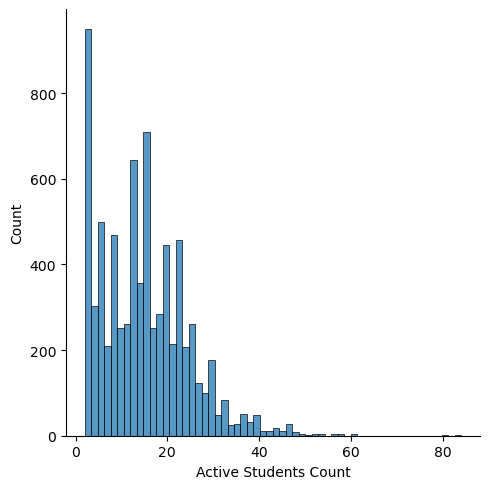

In [37]:
# We can use a seaborn .distplot()
# It's basically the same as a matplotlib histogram
# We can put all of the Subjects/Majors on one plot:

# NOTE: You can uncomment the code below to create the plots
# But if you named your dataframes something different, you'll need to update that part

sns.displot(df_courses_filtered, x="Active Students Count")

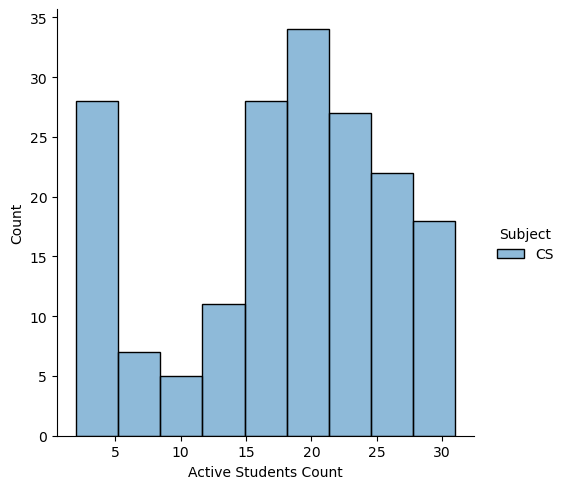

In [38]:
# Or we could show just one major

sns.displot(df_courses_filtered[df_courses_filtered["Subject"] == "CS"], x="Active Students Count", hue="Subject")

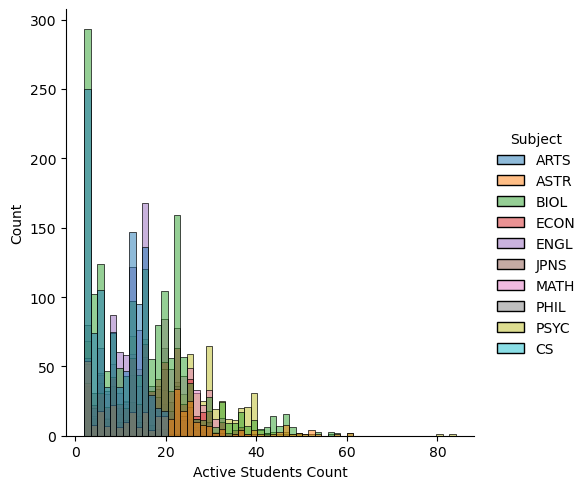

In [39]:
# Or we could show them all...
# But this is messy (although note how easy it is to make!)

sns.displot(df_courses_filtered, x="Active Students Count", hue="Subject")

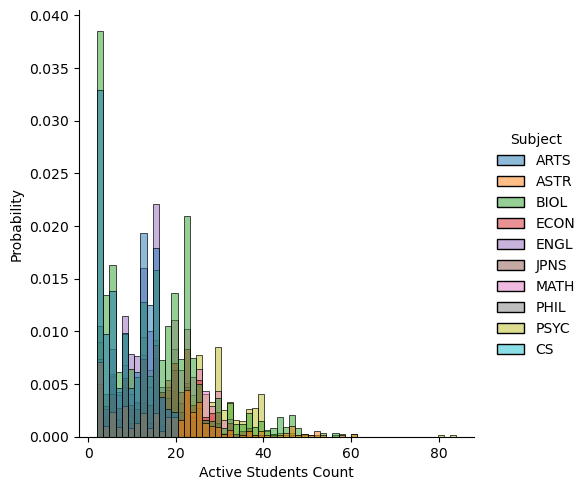

In [40]:
# And here we are normalizing:

sns.displot(df_courses_filtered, x="Active Students Count", hue="Subject", stat="probability")

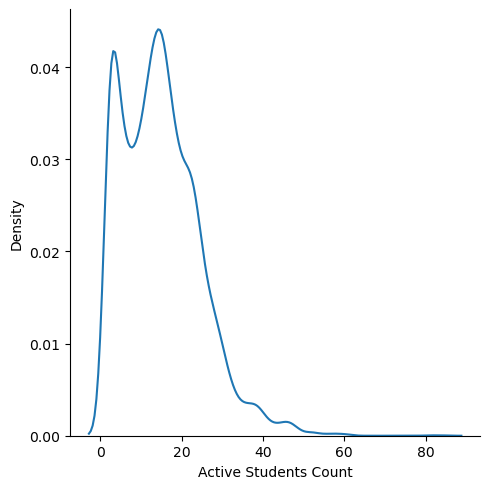

In [41]:
# We can also make a continuous plot
# This is using "kernel density estimation" to smooth out the histogram
# More at: https://en.wikipedia.org/wiki/Kernel_density_estimation

sns.displot(df_courses_filtered, x="Active Students Count", kind="kde")

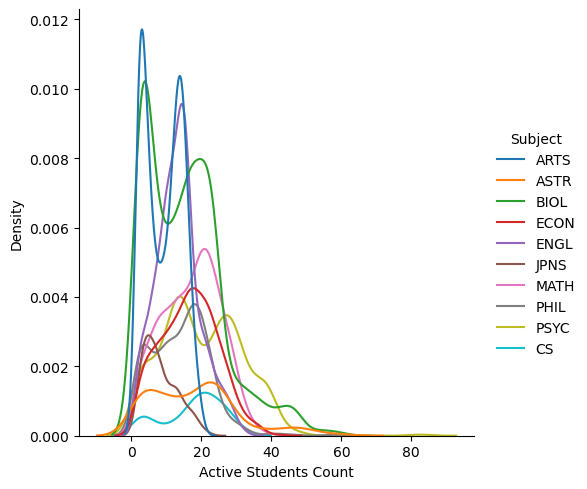

In [45]:
# Maybe it will be easier to see all of the courses if we use our smooth kernel density (kde) plot

sns.displot(df_courses_filtered, x="Active Students Count", kind="kde", hue="Subject")

To up our game, now let's visualize the Subjects/Majors separately.

To do this, let's play with a **catplot** -- which stands for categorical plot. This is useful for dealing with categorical data, like the different Subjects and Courses that we have in this data set. For more on catplot, check out: https://seaborn.pydata.org/generated/seaborn.catplot.html

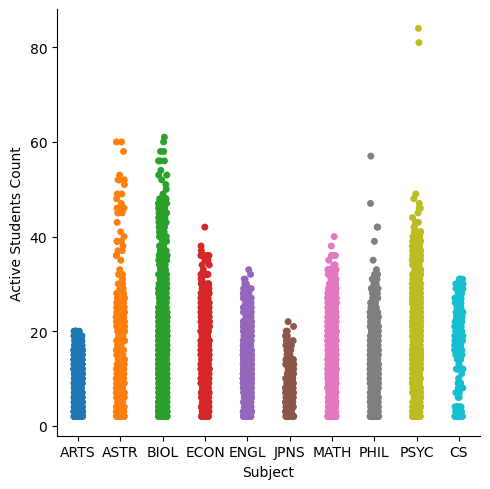

In [46]:
# A basic catplot showing the distributions...
# Notice how every course (row) becomes a dot

sns.catplot(data=df_courses_filtered, x="Subject", y="Active Students Count", hue="Subject")

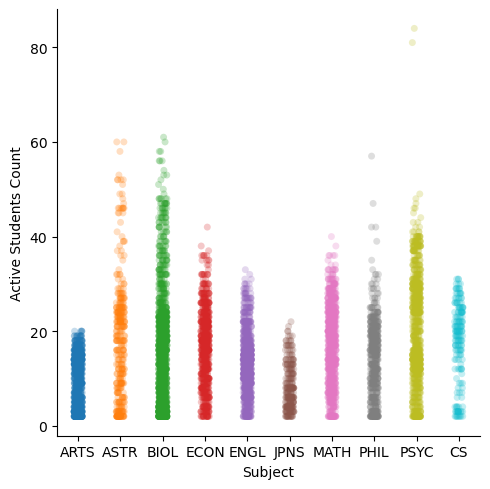

In [47]:
# Ok, that is a good start... let's try adding a jitter and making it transparent

sns.catplot(data=df_courses_filtered, x="Subject", y="Active Students Count", alpha=0.25, jitter=True, hue="Subject")

In [84]:
# This is a little messy, so let's try it with just the courses last semester

#sns.catplot(data=df_SP2023, x="Subject", y="Active Students Count", alpha=0.5, hue="Subject")

In [86]:
# With this smaller dataset, we can also try a swarmplot
# Notice the difference?

#sns.swarmplot(data=df_SP2023, x="Subject", y="Active Students Count", hue="Subject")

How else might we visualize distributions? We could do a box plot, also known as a box and whiskers plot. ([This post](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/box-plot-review) has a nice refresher on how box plots work.)

In [87]:
# We can change kind to "box"
#sns.catplot(data=df_courses, x="Subject", y="Active Students Count", kind="box")

In [88]:
# Or we could do a bar plot with errors
#sns.catplot(data=df_courses, x="Subject", y="Active Students Count", kind="bar")

In [89]:
# Or a violin plot (which is kind of like a box plot, but continuous)
#sns.catplot(data=df_courses, x="Subject", y="Active Students Count", kind="violin")

Notice how the different plots emphasize different features of the distributions. 

For example, the violin emphasizes many of the courses seems to have "lumps" --- these might be common course caps (12, 25, etc.).

And the bar chart really emphasizes the means.

What do the other visualizations empahsize?

In [50]:
# What are some other ways we can explore distributions?

In [1]:
# We could also make a grid of histograms

#sns.displot(df_courses, x="Active Students Count", col="Subject", col_wrap=2, height=2, aspect=2)

In [2]:
# We can also look at a BIVARIATE DISTRIBUTION...
# That is, distribution according to two different variables at once

# Let's look at the distribution of class size by term (semester) 

#sns.displot(df_courses, y="Active Students Count", x="Term")

In [3]:
# Oof, that's really ugly! Let's set the figure size

#my_plot = sns.displot(df_courses, y="Active Students Count", x="Term", height=8, aspect=1.5)

# And rotate the x-axes labels
#plt.xticks(rotation=45)
#plt.show()

# I'm showing you this not because you need to know this, but because these are the things that
# Will come up as you work on making plots :P

## Part 4: Time series
These plots aren't really great for looking at trends over time. Right now, "Term" is categorical. Can we turn it into a date-time object?

In [7]:
# Add three new columns into your data frame:
# Year
# Month
# Day

# For our purposes, you can assume that the Fall semester starts on August 1 
# and the Spring semester stats on January 1


# YOUR CODE HERE

Now, use pd.to_datetime to make a new column, "Date", that is a datetime object using the "Day" "Month" and "Year" info. Remember pd.to_datetime: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

In [10]:
# YOUR CODE HERE

In [92]:
# Let's make a bar chart showing the average class size over time

#fig, axs = plt.subplots(figsize=(10, 4))

#df_courses.groupby(df_courses["Date"])["Active Students Count"].mean().plot(kind='bar', rot=90, ax=axs)


#plt.xlabel("Semester")  # custom x label using Matplotlib

#plt.ylabel("Average Class Size")

In [93]:
# Or we could do a line
#fig, axs = plt.subplots(figsize=(20, 4))

#df_courses.groupby(df_courses["Date"])["Active Students Count"].mean().plot(kind='line', rot=90, ax=axs)


#plt.xlabel("Semester")  # custom x label using Matplotlib

#plt.ylabel("Average Class Size")

In [94]:
# What about plotting the **distribution** over time?
# This is what Seaborn does well!

#sns.lineplot(x="Date", y="Active Students Count", data=df_courses)

In [95]:
# We can also look at the different Subjects/Majors

#sns.lineplot(x="Date", y="Active Students Count", hue="Subject", data=df_courses)

In [96]:
# Wow, that's messy! Let's clean it up
# We can put the plots onto a grid
# To do this, we use .relplot()

#g = sns.relplot(
#    data=df_courses,
#    x="Date", y="Active Students Count", col="Subject", hue="Subject",
#    kind="line", col_wrap=2, height=2, aspect=1.5, legend=False,)

In [97]:
# What if we just want to look at the past 5 years?
# Now that we have a datetime object, we can use a Boolean selector!

#recent_classes = df_courses[df_courses["Date"] >= "01-01-2018"]

#g = sns.relplot(
#    data=recent_classes,
#    x="Date", y="Active Students Count", col="Subject", hue="Subject",
#    kind="line", col_wrap=2, height=2, aspect=1.5, legend=False,)

### CHALLENGE: What else can you do with this data?

You might try...
* Analyzing the overall number of students taking each Subject over time
* Coming up with another interesting question and answering it
* Making a useful function (i.e. our mean expereinced class size estimator)
* Making an exploratory visualization

What else might you want to do?